In [4]:
# kaggle - https://www.kaggle.com/datasets/rj2497/sale-forecasting-data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets using pandas' read_excel function
sales_pipeline = pd.read_excel('../data/sales-pipeline.xlsx')
interactions = pd.read_excel('../data/interactions.xlsx')

In [3]:
# head, isnull().sum(), describe, unique

# 1. Check the structure of the data
print("Sales Pipeline Data Info:")
sales_pipeline.info()

print("\nInteractions Data Info:")
interactions.info()

# 2. Preview the first few rows of the datasets
print("\nSales Pipeline Preview:")
display(sales_pipeline.head())

print("\nInteractions Preview:")
display(interactions.head())

# 3. Check for missing values
print("\nMissing Values in Sales Pipeline:")
print(sales_pipeline.isnull().sum())

print("\nMissing Values in Interactions:")
print(interactions.isnull().sum())

# 4. Summary statistics
print("\nSales Pipeline Summary Statistics:")
print(sales_pipeline.describe())

print("\nInteractions Summary Statistics:")
print(interactions.describe())

# 5. Look at unique values in key categorical columns
print("\nUnique values in Deal Stage:")
print(sales_pipeline['Deal_Stage'].unique())

print("\nUnique values in Product:")
print(sales_pipeline['Product'].unique())

Sales Pipeline Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Account            8800 non-null   object        
 1   Opportunity_ID     8800 non-null   object        
 2   Sales_Agent        8800 non-null   object        
 3   SalesAgentEmailID  8800 non-null   object        
 4   ContactEmailID     8800 non-null   object        
 5   Deal_Stage         8800 non-null   object        
 6   Product            8800 non-null   object        
 7   Close_Value        8800 non-null   int64         
 8   Created Date       8800 non-null   datetime64[ns]
 9   Close Date         8800 non-null   datetime64[ns]
 10  DateDiff           8800 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 756.4+ KB

Interactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316776

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256



Interactions Preview:


,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you



Missing Values in Sales Pipeline:
Account              0
Opportunity_ID       0
Sales_Agent          0
SalesAgentEmailID    0
ContactEmailID       0
Deal_Stage           0
Product              0
Close_Value          0
Created Date         0
Close Date           0
DateDiff             0
dtype: int64

Missing Values in Interactions:
interactionID                      0
fromEmailId                        0
toEmailId                          0
InteractionDate                    0
InteractionType(Call/Email/SMS)    0
Extracted Interaction Text         0
dtype: int64

Sales Pipeline Summary Statistics:
        Close_Value                   Created Date  \
count   8800.000000                           8800   
mean    1851.752614  2017-07-08 04:32:27.272727296   
min       38.000000            2016-01-04 00:00:00   
25%      492.000000            2017-03-24 00:00:00   
50%     1000.000000            2017-07-06 00:00:00   
75%     3393.000000            2017-10-15 00:00:00   
max    30288.0000

C:\Users\maric\AppData\Local\Temp\ipykernel_10984\46596779.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values, palette="Blues_d")


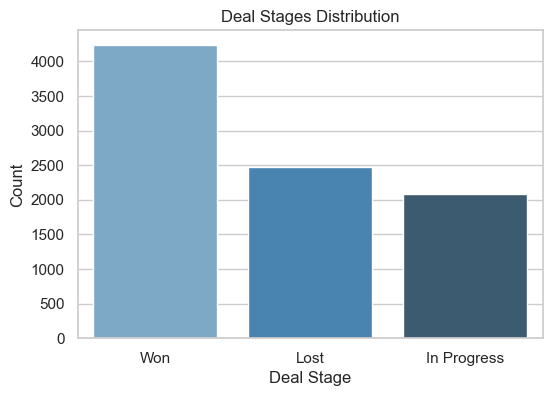

In [5]:
# Deal stage value counts

# Set the style for seaborn plots
sns.set(style="whitegrid")

### 1. Summarizing Deal Stages ###
deal_stage_counts = sales_pipeline['Deal_Stage'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=deal_stage_counts.index, y=deal_stage_counts.values, palette="Blues_d")
plt.title('Deal Stages Distribution')
plt.xlabel('Deal Stage')
plt.ylabel('Count')
plt.show()

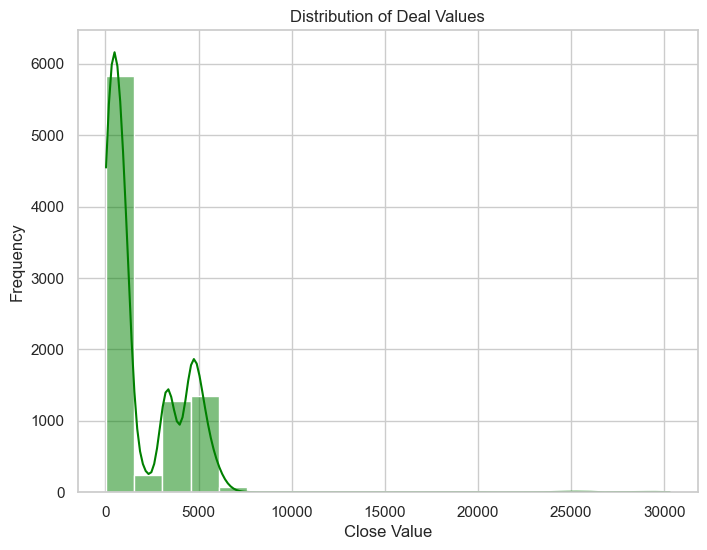

In [6]:
### 2. Deal Value Statistics ###
plt.figure(figsize=(8,6))
sns.histplot(sales_pipeline['Close_Value'], kde=True, bins=20, color='green')
plt.title('Distribution of Deal Values')
plt.xlabel('Close Value')
plt.ylabel('Frequency')
plt.show()

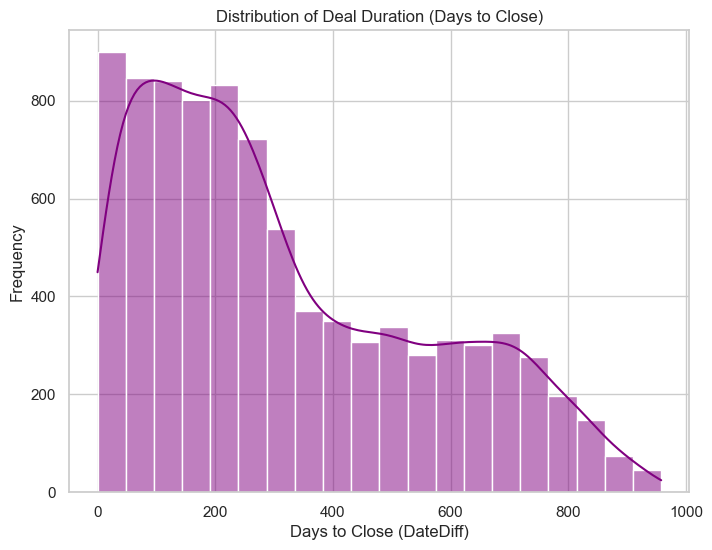

In [7]:
### 3. Deal Duration ###
plt.figure(figsize=(8,6))
sns.histplot(sales_pipeline['DateDiff'], kde=True, bins=20, color='purple')
plt.title('Distribution of Deal Duration (Days to Close)')
plt.xlabel('Days to Close (DateDiff)')
plt.ylabel('Frequency')
plt.show()

C:\Users\maric\AppData\Local\Temp\ipykernel_10984\260546879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")


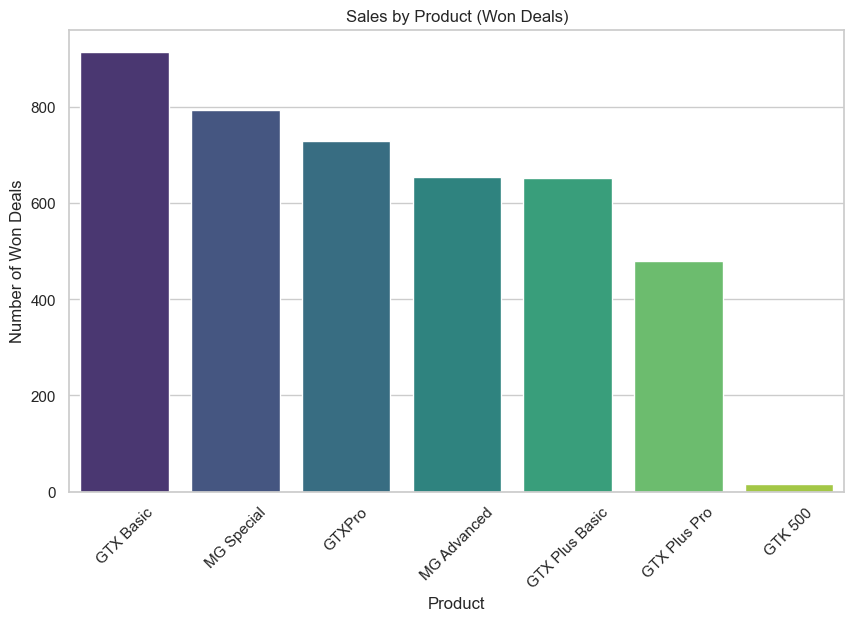

In [8]:
### 4. Sales by Product ###
won_deals = sales_pipeline[sales_pipeline['Deal_Stage'] == 'Won']
product_sales = won_deals['Product'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="viridis")
plt.title('Sales by Product (Won Deals)')
plt.xlabel('Product')
plt.ylabel('Number of Won Deals')
plt.xticks(rotation=45)
plt.show()

C:\Users\maric\AppData\Local\Temp\ipykernel_10984\2890971813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interaction_type_counts.index, y=interaction_type_counts.values, palette="Set2")


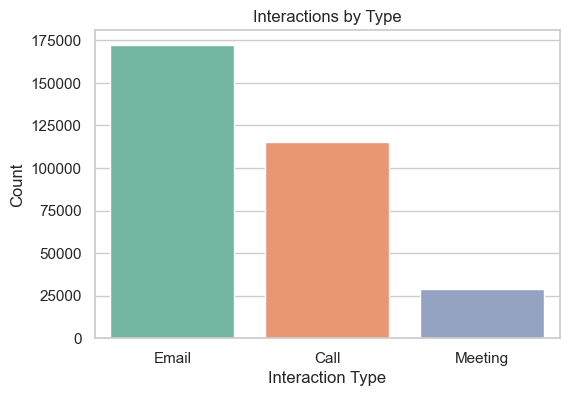

In [9]:
### 5. Interactions by Type ###
interaction_type_counts = interactions['InteractionType(Call/Email/SMS)'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=interaction_type_counts.index, y=interaction_type_counts.values, palette="Set2")
plt.title('Interactions by Type')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.show()